# Домашнее задание 2

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 17 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_2

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим проекцию на единичном $\ell_1$-шар:
\begin{equation*}
    \text{proj}_{C}(x) = \arg\min_{y \in C} \|x-y\|^2,
\end{equation*}
где $C = \{x ~|~ \|x\|_1 \leq 1 \}$.

__(а)__ Найдите выражение для такой проекции в явном виде.

# Правка
Искомая задача имеет вид(множитель $\frac{1}{2}$ взят для удобства вычислений):

$$
\begin{array}{lll}
    \text{min} \quad \frac{1}{2} \|x-y\|_2^2 \\
    \text{s.t. } \quad \|y\|_1 - 1 \leq 0
\end{array}
$$

Функция Лагранжа:

$$L(y, \lambda) = \sum\limits_{i = 1}^d\left(\dfrac{1}{2}(y_i - x_i)^2 + \lambda |y_i|\right) - \lambda$$

Пусть $$L_i(y_i, \lambda) = \dfrac{1}{2}(y_i - x_i)^2 + \lambda |y_i|$$

Из ККТ имеем:

$$0 \in \partial_{y_i} L_i$$

То есть 

$$ 0 \in y_i - x_i + \lambda \cdot \left\{
                                    \begin{array}{lll}
                                        -1, \text{ если } y_i < 0\\
                                        [-1; 1], \text{ если } y_i = 0\\
                                        1, \text{ если } y_i > 0
                                    \end{array} ~ \right.
\Longrightarrow
y_i \in x_i - \lambda \cdot \left\{
                                    \begin{array}{lll}
                                        -1, \text{ если } y_i < 0\\
                                        [-1; 1], \text{ если } y_i = 0\\
                                        1, \text{ если } y_i > 0
                                    \end{array}\right.$$

Тогда в общем случае получаем:

$$y_i = sign(x_i) \cdot \max(|x_i| - \lambda, 0) = sign(x_i) \cdot (|x_i| - \lambda)_+,$$

Теперь ККТ имеют вид:

$$\left\{\begin{array}{llll}
(1) ~ y_i = sign(x_i) \cdot (|x_i| - \lambda)_+ ~~ \forall i \in \overline{1, d}\\
(2) ~ \lambda \cdot (\|y\|_1 - 1) = 0\\
(3) ~ \lambda \geq 0\\
(4) ~ \|y\|_1 \leq 1 
\end{array}\right.$$

Условия (2) и (3) дают нам следующие варианты

1. $\lambda = 0$

Тогда $y_i = sign(x_i) \cdot |x_i| = x_i$, то есть (условие $(4)$) $\lambda = 0 \text{ при } \|x\|_1 \leq 1$

2. $\lambda > 0$

В этом случае $\|y\|_1 = 1$ и условие 4 выполнено автоматически. Необходимо только решить данное уравнение:

$$\|y\|_1 = \sum\limits_{i = 1}^d(|x_i| - \lambda)_+ = 1$$

Решение я нашел в [статье](https://pdfs.semanticscholar.org/3c63/e937c14f477e3880b143e9505b2efe4f5ccf.pdf) .

Алгоритм следующий: 

Введем функцию:

$$g(\lambda) = \sum\limits_{i = 1}^d(|x_i| - \lambda)_+ - 1 = 0$$

1. Сначала отсортируем вектор $|x| := (|x_1|, ... , |x_n|)^T$ по возрастанию, получим вектор $ \widetilde{x} := sort(|x|)$

2. Если $g(0) \leq 0$, то $\|x\|_1 \leq 1$ и можно взять $y = x$. 

Если $g(0) > 0$, то на каком то из отрезков $[\widetilde{x}_i; \widetilde{x}_{i+1}]$ мы обязательно найдем решение, так как $g(\lambda \geq \widetilde{x}_d) = -1 < 0$ и $g(\lambda)$ кусочно-линейная и убывающая функция (т.к. $(-\lambda)_+$ - убывающая функция). 

Ищем такое $m \in \overline{1, d} : g(\widetilde{x}_m) \geq 0 \text{ и } g(\widetilde{x}_{m+1}) < 0$ (такое $m$ всегда существует и единственно). 

Именно на $[\widetilde{x}_m; \widetilde{x}_{m+1}]$ и лежит наше решение $\lambda$.

3. Новое уравнение имеет вид:

$$g(\lambda) = \sum\limits_{i = m+1}^d(|x_i| - \lambda) - 1 = 0$$

А его решение:

$$\lambda = \dfrac{1}{d - m - 1} \cdot \left(\sum\limits_{i = m+1}^d|x_i| - 1\right)$$

Сложность ${O}(d\,logd)$.

# Конец правки

__(б)__ Сравните:
\begin{equation*}
    \text{proj}_C (x) \quad \text{и} \quad \text{prox}_{\lambda \mathbb{I}_C} (x),
\end{equation*}
где $\lambda > 0$, а $\mathbb{I}_C$ - индикаторная функция множества $C$:
$$
\mathbb{I}_C = 
\begin{cases}
0 ,& x \in C \\
+\infty, &x \notin C.
\end{cases}
$$
Являются ли данные операторы эквивалентными для любых $\lambda > 0$ и выпуклых $C$?

Запишем определения: $$proj_{C}(x) = \arg\min_{y\in C} \|x - y\|_2^2$$ $$prox_{\lambda I_C}(x) = \arg\min_{y}\frac{1}{2\lambda}\|x - y\|_2^2 + I_C(y)$$ 
Ясно, что если $x^*$ является решением задачи $\underset{y\in C}{\min} \|x - y\|_2^2$, то он является и решением задачи $\underset{y}{\min}\frac{1}{2\lambda}\|x - y\|_2^2 + I_C(y)$, тк индикаторная функция на нем обнуляется, а константный множитель выносится за знак минимума. Обратно: если $x^*$ - решение задачи $\underset{y}{\min}\frac{1}{2\lambda}\|x - y\|_2^2 + I_C(y)$ и $C$ - непустое, то значение этой задачи $< +\infty$(иначе берем точку из $C$, норма принимает только конечные значения $\Rightarrow$ противоречие с тем, что $x^*$ - решение), тогда $I_C(x^*) = 0 \Leftrightarrow x^*\in C$ и доставляет минимум функционалу $\frac{1}{2\lambda}\|x - y\|_2^2$, а значит и функционалу $\|x - y\|_2^2$, то есть $x$ - решение задачи $\underset{y\in C}{\min} \|x - y\|_2^2$. Значит - операторы эквивалентны.

## Задача 2

Рассмотрим задачу минимизации эмпирического риска:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n l (g(w, x_i), y_i),
\end{equation}
где $l$ - функция потерь, $g$ - модель, $w$ - параметры модели, $\{x_i, y_i\}_{i=1}^n$ - выборка данных из векторов признаков $x_i$ и меток $y_i$.

Далее будем рассматривать линейной модель $g(w, x) = w^T x$ и квадратичную функцию потерь $l(z, y) = (z-y)^2$.

__(а)__ Запишите задачу минимизации эмпирического риска с линейной моделью  и квадратичной функцией потерь в векторно-матричном виде, используя $X$ - матрицу из векторов $\{x_i\}$ и вектор $y$ - из $\{y_i\}$.

Задача выглядит следующим образом: $$\underset{w\in\mathbb{R}^d}{\min}\frac{1}{n}\|Xw - y\|^2_2$$

__(б)__ К заданию приложен датасет _mushrooms_. С помощью следующего кода сформируйте матрицу $X$ и вектор $y$:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(43)

In [2]:
dataset = "mushrooms.txt" 
#файл должен лежать в той же деректории, что и notebook

In [82]:
from sklearn.datasets import load_svmlight_file
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape

Разделите (лучше случайно) данные (а значит $X$ и $y$) на две части: обучающую и тестовую (примерно в отношении $4$ к $1$). Опишите, как это было сделано.

Вообще конечно мне больше по душе пользоваться train_test_split'ом из sklearn, он вроде как никогда не подводил. Но можно написать свой, например вот так: пользуемся функцией sample из pandas, она дает нам случайный пример размера нашей признаковой матрицы(то есть просто случайную перестановку строк), далее делим полученные данные в нужном отношении. 

In [4]:
def my_train_test_split(X, y, test_size):
    X = pd.DataFrame(data = X)
    y = pd.DataFrame(data = y)
    
    X_shuffled = X.sample(frac = 1)
    y_shuffled = y.sample(frac = 1)
    
    X_train = X_shuffled[int(test_size * len(X)) + 1:]
    y_train = y_shuffled[int(test_size * len(y)) + 1:][0]
    
    X_test = X_shuffled[:int(test_size * len(X)) + 1]
    y_test = (y_shuffled[:int(test_size * len(y)) + 1])[0]
    
    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test) 

In [5]:
X_train_my, X_test_my, y_train_my, y_test_my = my_train_test_split(X, y, 0.2)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

Далее будем тестировать на обоих вариантах разделения.

__(в)__ Для обучающей части $X_{train}$, $y_{train}$ оцените константу $L$ задачи обучения/оптимизации. Будет ли задача выпуклой? Сильно выпуклой?

Рассмотрим целевую функцию: $$f(w) = \frac{1}{n}\|Xw - y\|^2_2 = \frac{1}{n}\langle Xw - y, Xw - y\rangle = \frac{1}{n}\langle X^TXw, w\rangle - \frac{2}{n}\langle X^Ty, w\rangle + \frac{1}{n}\langle y, y\rangle$$ То есть мы имеем дело с квадратичной задачей, в прошлом дз мы показывали, что если матрица $A$ симметричная, а у нас $A = \frac{2}{n}X^TX$ - симметричная всегда, то для выпуклости достаточно $X^TX \succcurlyeq 0$, а для сильной выпуклости соответственно: $\frac{2}{n}X^TX\succcurlyeq \mu E$ или же $\mu \leq\lambda_{min}(\frac{2}{n}X^TX)$.

Константа $L$ оценивается из тех же соображений: $L = \lambda_{max}(A) = \lambda_{max}(\frac{2}{n}X^TX)$

# Правка
Посмотрим, как выдядит спектр матрицы $\frac{2}{n}X^TX$ :

In [7]:
print('Значения собственных чисел нашей матрицы в порядке возрастания: \n', 
      np.sort(np.real(np.linalg.eigvals((2 / (X_train.shape[0])) * (X_train.T @ X_train)))))

Значения собственных чисел нашей матрицы в порядке возрастания: 
 [-3.87474635e-16 -2.10290399e-16 -1.78341833e-16 -9.09951022e-17
 -9.09951022e-17 -4.97677952e-17 -4.97677952e-17 -4.40855379e-17
 -4.29038068e-17 -4.29038068e-17 -1.59848527e-17 -1.59848527e-17
 -1.57803130e-17 -3.00390348e-26  1.45072711e-20  3.23968553e-19
  3.23968553e-19  1.19293673e-18  7.75927744e-18  2.04855841e-17
  2.04855841e-17  2.44007640e-17  4.20788020e-17  6.57027178e-17
  7.25503607e-17  7.25503607e-17  1.48074074e-16  2.06485266e-16
  3.95466144e-04  7.17635598e-04  1.03118814e-03  1.21706595e-03
  1.31548078e-03  1.71529554e-03  2.33681345e-03  3.07691705e-03
  3.13611555e-03  3.42202343e-03  3.76197969e-03  3.98432471e-03
  5.14051108e-03  6.47039845e-03  7.10666207e-03  7.32208523e-03
  8.55292092e-03  1.00058044e-02  1.04089387e-02  1.07287154e-02
  1.21681150e-02  1.26686806e-02  1.39777521e-02  1.45943797e-02
  1.61068451e-02  1.74228409e-02  1.92995992e-02  2.32407312e-02
  2.34785374e-02  2.7791

Как видно, минимальное собственное число $\lambda_{min} \approx -4\cdot10^{-16}$. Но теоритически мы знаем, что у матрицы $X^TX$ не может быть отрицательных собственных чисел, сошлемся на машинный ноль и скажем, что задача сильно выпуклой не является. Выпуклой при этом, конечно, задача будет, тк матрица определена неотрицательно.

# Конец правки

__(г)__ Используя материалы прошлого ДЗ (по желанию), решите задачу оптимизации/обучите модель машинного обучения с помощью градиентного спуска. Изобразите график сходимости. Какой критерий сходимости будет использовать? Сделайте вывод. Опишите проблемы, с которыми пришлось столкнуться.

$\textbf{Решение}$

Ниже реализована модель линейной регрессии, класс обладает следующими методами: fit - обучаемся, predict - предсказываем, $\_$calc$\_$gradient - внутренняя функция, вычисляющая градиент, get$\_$losses - получаем значение минимизируемого функционала, get_accuracy - получаем массив из матриц весов, полученных на шагах кратных тысяче(нужно для пункта г),  get_grads - получаем массив значений норм градиентов на каждом шаге.
Функция fit выводит значение нормы градиента на каждой кратной тысяче итерации.
Параметр fit_intercept отвечает за столбец свободных членов.

In [134]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [9]:
class My_Linear_Regression:
    def __init__(self, fit_intercept = True):
        self.fit_intercept = fit_intercept
    
    def fit(self, X, y, gamma, eps = 10**(-3)):
        n, k = X.shape
        
        self.w = np.random.randn(k + 1 if self.fit_intercept else k)
        
        X = np.hstack((X, np.ones((n, 1)))) if self.fit_intercept else X
        
        self.accuracy = []
        self.accuracy.append(self.w)
        self.losses = []
        grad = np.random.randn(k + 1 if self.fit_intercept else k)
        
        self.grads = [np.linalg.norm(grad, ord = 2)]
        while np.linalg.norm(grad, ord = 2) > eps:
            
            y_pred = self.predict(X)
            self.losses.append(mean_squared_error(y_pred, y))

            grad = self._calc_gradient(X, y, y_pred)
            self.grads.append(np.linalg.norm(grad, ord = 2))
            assert grad.shape == self.w.shape, f"gradient shape {grad.shape} is not equal weight shape {self.w.shape}"
            
            self.w -= gamma * grad
            
            if len(self.grads) % 1000 == 0: 
                print(f'Занчение нормы градиента на {len(self.grads)} итерациии - ', np.linalg.norm(grad, ord = 2))
                self.accuracy.append(self.w - gamma * grad)
            
        return self
    
    def predict(self, X):
        
        n, _ = X.shape
        
        if self.fit_intercept:
            X = np.hstack((X, np.ones((n, 1))))
        
        assert X.shape[1] == self.w.shape[0], f"fatal error in pred"
        
        y_pred = X @ self.w

        return y_pred
    
    def _calc_gradient(self, X, y, y_pred):
        
        n, _ = X.shape
        
        if self.fit_intercept:
            X = np.hstack((X, np.ones((n, 1))))
        
        grad = (2 / n) * (X.T @ (y_pred - y))
        
        return grad
    
    def get_losses(self):
        
        return self.losses
    
    def get_accuracy(self, X, y):
        accuracy = []
        for i in range(len(self.accuracy)):
            accuracy.append(mean_squared_error(X @ self.accuracy[i] , y))
        
        return accuracy
    
    def get_grads(self):
        
        return self.grads

Посмотрим, что получится, если взять $\gamma = 0.09$ в градиентном спуске и в качестве критерия сходимости использовать вторую норму градиента, т.е.  $\|\nabla f\|_2 < \epsilon,$ где $\epsilon = 10^{-3}$.

In [139]:
%%time
regressor = My_Linear_Regression(fit_intercept = False)
regressor.fit(X_train, y_train, 0.095725, eps = 10**(-2))

errors = regressor.get_grads()

Занчение нормы градиента на 1000 итерациии -  0.011882464400747252
CPU times: total: 2.55 s
Wall time: 643 ms


In [11]:
%%time
regressor1 = My_Linear_Regression(fit_intercept = False)
regressor1.fit(X_train_my, y_train_my, 0.09)

errors_my = regressor1.get_grads()

Занчение нормы градиента на 1000 итерациии -  0.01867451074148576
Занчение нормы градиента на 2000 итерациии -  0.008205918028530039
Занчение нормы градиента на 3000 итерациии -  0.004747129407582207
Занчение нормы градиента на 4000 итерациии -  0.003104780027879789
Занчение нормы градиента на 5000 итерациии -  0.0022103375711552526
Занчение нормы градиента на 6000 итерациии -  0.0016744708960338
Занчение нормы градиента на 7000 итерациии -  0.001329428622512175
Занчение нормы градиента на 8000 итерациии -  0.0010949818258626477
CPU times: total: 14.8 s
Wall time: 3.71 s


# Правка
Добавил на график критерий, показан в легенде.

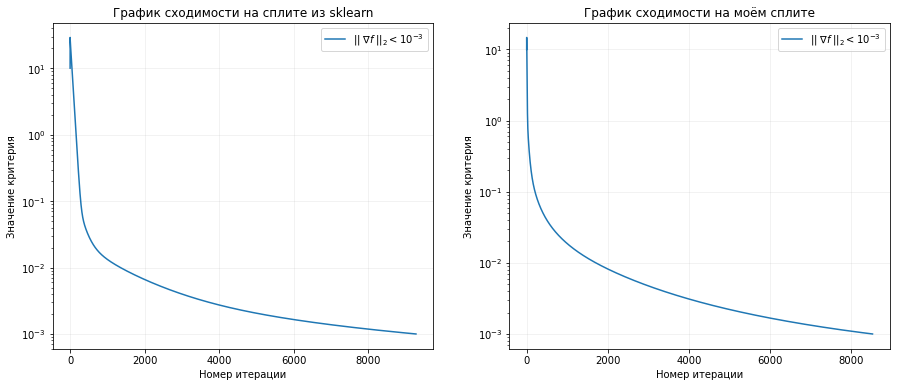

In [12]:
fig, axs = plt.subplots(1, 2, figsize = (15, 6))

axs[0].plot(errors, label = r'$||\;\nabla f\;||_2 < 10^{-3} $')
axs[0].set_title('График сходимости на сплите из sklearn')
axs[0].set_ylabel('Значение критерия')
axs[0].set_xlabel('Номер итерации')
axs[0].grid(alpha = 0.2)
axs[0].set_yscale('log')
axs[0].legend(loc = 'upper right')

axs[1].plot(errors_my, label = r'$||\;\nabla f\;||_2 < 10^{-3} $')
axs[1].set_title('График сходимости на моём сплите')
axs[1].set_ylabel('Значение критерия')
axs[1].set_xlabel('Номер итерации')
axs[1].grid(alpha = 0.2)
axs[1].set_yscale('log')
axs[1].legend(loc = 'upper right')

plt.show()

# Конец правки 

Как видно из графиков, метод сходится, причем скорость сходимости существенно зависит от начальных данных(как от сплита выборки, так и от начального вектора градиента - это видно при повторном запуске fit для идентичных гиперпараметров).

__(д)__ Как использовать итоговую модель для предсказания? Ответив на вопрос, сделайте предсказания на тестовой выборке. Сравните с реальными метками. Количество правильно угаданных меток есть точность/accuracy вашей модели. Запустите еще раз процесс обучения из пункта г), постройте как меняется точность модели от номера итерации градиентного спуска (измеряйте не каждую итерацию, а, например, каждую 100 или 1000). 

$\textbf{Решение}$

Для предсказания используется функция predict, которая просто умножает матрицу весов, полученную при фите, на матрицу признаков: это и будет нужный нам вектор ответов. 

Судя по датасету мы тут предсказываем метки классов, поэтому просто градиентый спуск не совсем верное решение(мы всегда будем получать ошибку из-за действительных чисел), было бы правильнее использовать в конце "функцию активации"(округлить до ближайшего целого например) и выдать реально метки классов без погрешности.

Посмотрим, какую точность нам даст регрессия из коробки, в качестве метрики используем coefficient of determination($R^2$) :

In [13]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [14]:
reg = LinearRegression().fit(X_train, y_train)
y_pred_box = reg.predict(X_test)
print('Точность по метрике R^2: ', reg.score(X_test, y_test))

Точность по метрике R^2:  0.995155997189719


In [15]:
reg = LogisticRegression().fit(X_train, y_train)
y_pred_box = reg.predict(X_test)
print('Точность по метрике R^2: ', r2_score(y_test, y_pred_box))

Точность по метрике R^2:  1.0


Как видно: для задачи классификации линейная регрессия работает неплохо, но лучше все-таки использовать логистическую :)

Посмотрим теперь, что выдаст наша реализация:

In [137]:
predictions = regressor.predict(X_test)
print('Coefficient of determination: ', r2_score(y_test, predictions))

Coefficient of determination:  0.9930842870420523


Уже неплохо, но если применить функцию округления:

In [138]:
print('Coefficient of determination: ', accuracy_score(y_test, np.round(predictions)))

Coefficient of determination:  1.0


При перезапуске ноутбука может не получиться(из-за случайного выбора начального вектора градиента), но мне удавалось при определенной доле везения получить accuracy 1.0

Обучимся еще раз(используем сплиты из skrearn, хотя это ни на что не влияет):

In [18]:
%%time
regressor = My_Linear_Regression(fit_intercept = False)
regressor.fit(X_train, y_train, 0.09)

accuracy = regressor.get_accuracy(X_test, y_test)

Занчение нормы градиента на 1000 итерациии -  0.016838013382920267
Занчение нормы градиента на 2000 итерациии -  0.008071579987647615
Занчение нормы градиента на 3000 итерациии -  0.005084629502313732
Занчение нормы градиента на 4000 итерациии -  0.0035738272389346996
Занчение нормы градиента на 5000 итерациии -  0.002634784702620703
Занчение нормы градиента на 6000 итерациии -  0.001991215034182663
Занчение нормы градиента на 7000 итерациии -  0.0015302011217354953
Занчение нормы градиента на 8000 итерациии -  0.001192975540535656
CPU times: total: 17.2 s
Wall time: 4.3 s


Построим график зависимости точности предсказаний от номера итерации:

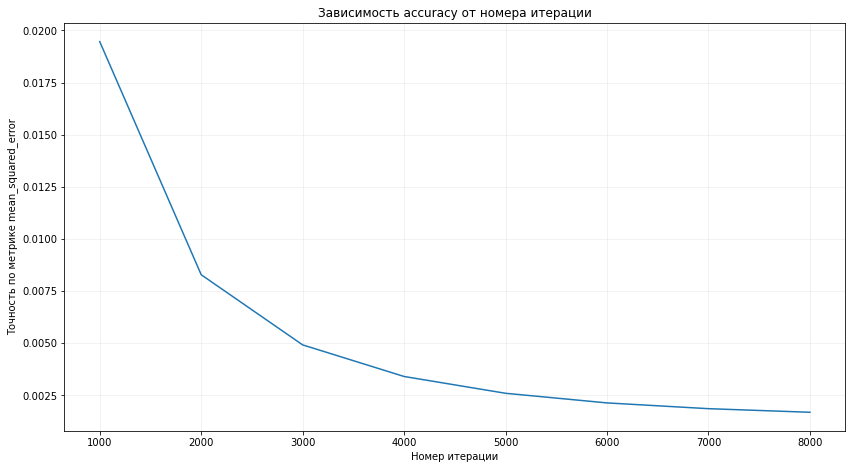

In [19]:
plt.figure(figsize = (14, 7.5))
x = 1000 * np.array(range(len(accuracy)))
plt.plot(x[1:], accuracy[1:])
plt.title("Зависимость accuracy от номера итерации")
plt.xlabel("Номер итерации")
plt.ylabel("Точность по метрике mean_squared_error")
plt.xticks(x[1:])

plt.grid(alpha = 0.2)
plt.show()

Как видно из графика, точность модели увеличивается по мере увеличения номера шага.

__(e)__ Теперь рассмотрим эту же задачу обучения на $\ell_1$-шаре с радиусом $\lambda$. Повторите пункты г) и д) только теперь градиентный спуск должен быть модифицирован с помощью оператора проекции. Пробуйте различные $\lambda > 0$ и найдите лучшее (опишите почему именно такое лучшее). Удалось ли улучшить процесс обучения/точность модели на тестовой выборке? 

Реализуем оператор проекции, алгоритм имеет следующий вид: 
1) Нам известны координаты точки, тогда мы можем определить область пространства(квадрант), в которой она находится. Смотрим знаки координат и запоминаем.

2) Каждому квадранту соответствует ровно одна из гиперплоскостей, формирующих $l_1$-шар.

3) По знакам координат $x$ получаем вектор нормали к этой плоскости(берем знаки координат вектора $x$, где $>0$ ставим 1, где $<0$ - ставим -1, нули оставляем нулями, затем нормируем). Находим расстояние по формуле $h = \frac{\langle\textbf{x}_{} - \textbf{ r}_0, \textbf{ n}_{}\rangle}{\|\textbf{n}\|}$, где $\textbf{ r}_0$ - произвольная точка плоскости, мы выбираем вершину гиперплоскости(выбираем прозвольную ненулевую координату вектора $x$, ставим единицу на этом месте, остальные координы ноль).

4) Далее вычисляем вектор проекции $x$ на гиперплоскость по известной формуле: $\textbf{p} = \textbf{x}_{} - h\textbf{n}$. Если $\|\textbf{p}\|_1 = 1$, то заканчиваем.

5) Сравниваем знаки координат векторов $x$ и $p$: если $i$-тая компонента вектора $p$ поменяла знак относительно $i$-той компоненты вектора $x$ или если эта компонента равна нулю, то мы объявляем эту компоненту нулем. Теперь откидываем все нулевые компоненты вектора $p$(запоминая позиции) и вызываем функцию проектирования(рекурсия) на гиперплоскость меньшей размерности(она характеризуется вектором нормали, у которого выкинуты соответствующие вектору $p$ компоненты). Из рекурсии достаем правильную проекцию и восстанавливаем по запомненным позициям вектор в искомой размерности.

In [20]:
def my_proj(vector_x, R):
    
    if (np.linalg.norm(vector_x, 1) <= R):
        return vector_x
    
    #Вектор нормали
    vector_n = np.sign(vector_x)
    vector_n = vector_n / np.linalg.norm(vector_n, 2)
    
    #Точка на плоскости
    vector_r0 = np.zeros(len(vector_x))
    vector_r0[0] = R * np.sign(vector_x[0])
    
    #Считаем расстояние 
    h = np.abs((vector_x - vector_r0) @ vector_n) 
    
    vector_y = vector_x - h * vector_n

    eps = 10e-6
    if (np.abs(np.linalg.norm(vector_y) - R) < eps):
        return vector_y
        
    #Понижаем размерность
    save_positions = np.zeros(len(vector_x))
    components_for_next_proj = []
        
    for i in range(len(vector_x)):
        if (vector_y[i] * vector_x[i] <= 0):
            save_positions[i] = -1
        else:
            components_for_next_proj.append(vector_y[i])        
        
    components_for_next_proj = np.array(components_for_next_proj)
        
    # Заново проецируем, но уже с меньшей размерностью.
    new_proj = my_proj(components_for_next_proj, R)

    # Вектор проекции в текущем пространстве, нахуй его зануляем
    vector_proj = np.zeros(len(vector_x))
        
    # Размерность пространства
    len_proj =  len(vector_proj)
    # Размерность подпространства
    len_new_proj = len(new_proj)
        
    i = 0
    k = 0
    while (i < len_proj and k < len_new_proj):
        if (save_positions[i] != -1):
            vector_proj[i] = new_proj[k]
            k = k + 1
        i = i + 1

    return vector_proj

Данный алгоритм работает в худшем случае за квадрат, а в среднем по идее очень быстро, тк с увеличением размерности быстро убывает отношение объемов, которое по сути и есть вероятность. 

Однако у нас не получилось переписать рекурсию в цикл, поэтому на матрице из домашней задачи мы ловили превышение глубины рекурсии. За неимением времени было принятно решение использовать другой алгоритм. 

In [24]:
vector = 10 * np.random.randn(10)
print(vector)
other = proj(vector, 10)
vova = my_proj(vector, 10)
print(vova)
print(other)

[ -0.66354444 -12.06974803  -8.63728234   2.5489316   18.54404935
   0.20404203  -9.24580159  -0.89585996   3.98253959   3.03819263]
[ 0.         -1.76284934  0.          0.          8.23715066  0.
  0.          0.          0.          0.        ]
[ 0.         -4.37037177 -0.93790607  0.         10.84467308  0.
 -1.54642533  0.          0.          0.        ]


Функция проектирования:


In [22]:
def proj(x0, R):
    x = np.copy(x0)
    d = int (x0.shape[0]) + 1

    if (np.linalg.norm(x) <= R):
        lambd = 0
    else:
        x = np.absolute(x)
        x = np.append(x, 0)
        x = np.sort(x)
        
        x_first = np.flip(x)
        first = np.flip(np.cumsum(x_first))
        
        second = np.multiply(np.arange(d), x)

        third = x * (-d - 1)

        forth = np.ones(d) * (-R)

        g_deriv = 2 * ( first + second + third + forth )
        k  = np.min(np.where(g_deriv[1:] * g_deriv[:-1] <= 0))
        
        lambd = (first[k] - x[k] - R) / (d - k) 

    y = np.zeros(d - 1)
    
    y[x0 <= -lambd] = x0[x0 <= -lambd] + lambd
    
    y[x0 >= lambd] = x0[x0 >= lambd] - lambd

    return y

Дочка класса, написанного выше, использующая проекцию:

In [129]:
class My_Proj_Linear_Regression(My_Linear_Regression):
    def __init__(self, **kwargs):
        super().__init__(**kwargs) # передаем именные параметры родительскому конструктору
        self.w = None

    def fit(self, X, y, gamma, R, eps = 10**(-3)):
        n, k = X.shape
        
        self.w = np.random.randn(k + 1 if self.fit_intercept else k)
        
        X = np.hstack((X, np.ones((n, 1)))) if self.fit_intercept else X
        
        self.accuracy = []
        self.accuracy.append(self.w)
        self.losses = []
        grad = np.random.randn(k + 1 if self.fit_intercept else k)
        
        self.grads = [np.linalg.norm(grad, ord = 2)]
        
        while np.linalg.norm(grad, ord = 2) > eps:
            
            y_pred = self.predict(X)
            self.losses.append(mean_squared_error(y_pred, y))
            
            #if len(self.losses) > 10**4 and self.losses[-1] > self.losses[-2]:
            #    return self
            if len(self.losses) > 5 * 10**(4):
                return self
            
            grad = self._calc_gradient(X, y, y_pred)

            self.w = proj(self.w - gamma * grad, R)
            
            self.grads.append(np.linalg.norm(proj(grad, R), ord = 2))

            if len(self.grads) % 1000 == 0: 
                self.accuracy.append(proj(self.w - gamma * grad, R))
            
        return self

Посмотрим, как измелись графики сходимости для разных значений радиусов шаров:

In [98]:
%%time
errors = []
predictions = []
accuracy = []
Rs = [1, 2, 60, 5, 10, 20, 40, 3]
for R in Rs:
    regressor = My_Proj_Linear_Regression(fit_intercept = False)
    regressor.fit(X_train, y_train, 0.07, R)
    predictions.append(regressor.predict(X_test))
    errors.append(regressor.get_grads())
    accuracy.append(regressor.get_accuracy(X_test, y_test))

CPU times: total: 3min 31s
Wall time: 53.3 s


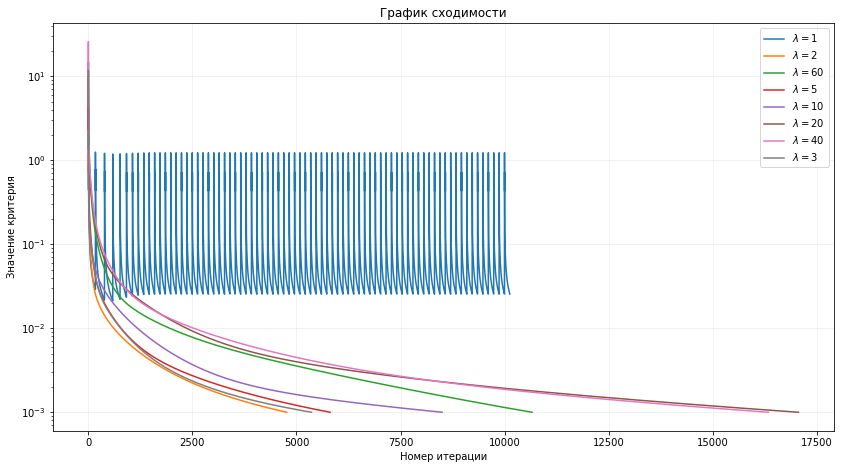

In [99]:
plt.figure(figsize = (14, 7.5))

for i in range(len(Rs)):
    plt.plot(errors[i], label = '$\lambda = $' + str(Rs[i]))

plt.title("График сходимости")
plt.xlabel("Номер итерации")
plt.ylabel("Значение критерия")
plt.yscale('log')
#plt.xticks

plt.legend(loc = 'upper right')
plt.grid(alpha = 0.2)
plt.show()

# Правка
Неправильно выразился, метод не расходится, а сходится к другому числу, а именно:

In [127]:
%%time
regressor.fit(X_train, y_train, 0.09, 3)
losses = regressor.get_losses()
E = regressor.get_grads()
print('Значение задачи при \lambda = 1: ', losses[-1])
print(np.linalg.norm(regressor.w, ord = 1))

Значение задачи при \lambda = 1:  0.0013744865607776986
12.29368062412025
CPU times: total: 10 s
Wall time: 2.62 s


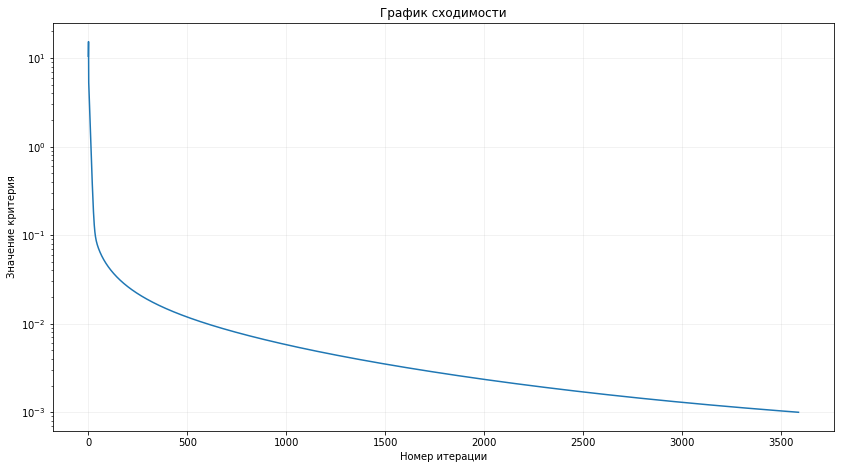

In [128]:
plt.figure(figsize = (14, 7.5))

plt.plot(E)

plt.title("График сходимости")
plt.xlabel("Номер итерации")
plt.ylabel("Значение критерия")
plt.yscale('log')

plt.grid(alpha = 0.2)
plt.show()

Ну то есть решение не лежит в $l_1$-шаре радиуса 1, поэтому мы каждый раз проецируемся и удаляемся от решения, потом делаем шаг к решению, но снова проецируемся и остаемся на $l_1$-шаре.
# Конец правки

Для всех значений радиуса сходимость есть, причем при определенных из них(когда радиус не слишком большой, тк мы просто ходим внутри большого шара никуда не проецируясь) скорость сходимости значительно выше: при $\lambda = 3$ число шагов равно
4203, что более чем в 2 раза превосходит обычный метод.

Посмотрим на точность:

In [85]:
for i in range(len(Rs)):
    print(f'Accuracy score for lambda = {Rs[i]} : ', accuracy_score(y_test, np.round(predictions[i])))

Accuracy score for lambda = 1 :  0.008615384615384615
Accuracy score for lambda = 2 :  0.9993846153846154
Accuracy score for lambda = 60 :  0.9981538461538462
Accuracy score for lambda = 5 :  1.0
Accuracy score for lambda = 10 :  1.0
Accuracy score for lambda = 20 :  1.0
Accuracy score for lambda = 40 :  0.9993846153846154
Accuracy score for lambda = 3 :  1.0


Лучшая точность получилась для $\lambda = 2$, однако скорее всего это связано со случайностью в градиентном спуске, тк разница очень мала.

Построим графики точности от числа итераций:

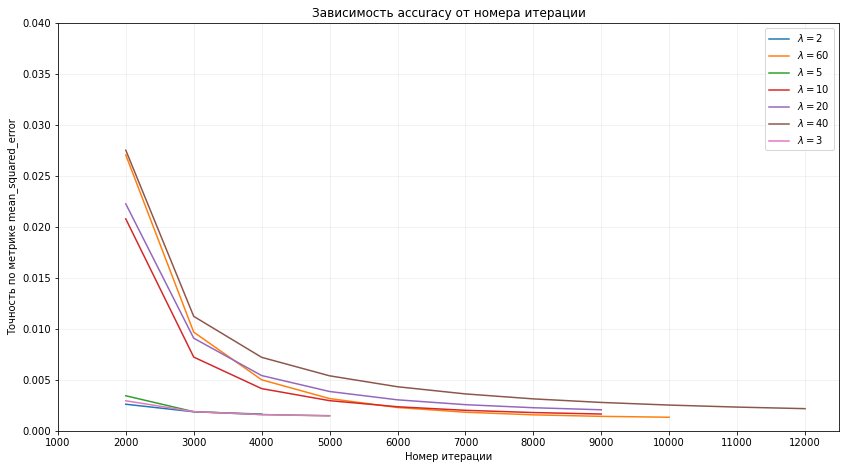

In [28]:
plt.figure(figsize = (14, 7.5))

x = 1000 * np.array(range(13))

for i in range(len(Rs) - 1):
    plt.plot(x[2: len(accuracy[i + 1]) + 1], accuracy[i + 1][1:], label = '$\lambda = $' + str(Rs[i + 1]))

plt.title("Зависимость accuracy от номера итерации")
plt.xlabel("Номер итерации")
plt.ylabel("Точность по метрике mean_squared_error")
plt.xticks(x[1:])
plt.xlim(left = 1000)
plt.ylim(bottom = 0.000, top = 0.040)

plt.legend(loc = 'upper right')
plt.grid(alpha = 0.2)
plt.show()

Как видно, быстрее всего точность увелиивается для $\lambda = 2$.

Делаем вывод: оператор проекции улучшает градиентный спуск по скорости сходимости(число итераций) и по точности.

__Бонусные пункт__

__(ж)__ Снова рассмотрим задачу обучения без ограничений, но добавим к ней регуляризатор 1) $\lambda \| x \|_1$ c $\lambda  > 0$, 2) $\lambda \| x \|_2$ c $\lambda  > 0$. Сможем ли для новой задачи с регуляризатором использовать честный градиентный спуск без модификаций? Почему? Предложите свои идеи, как модифицировать градиентный спуск для новой задачи. Проведите для него эксперименты из пунктов г) и д).  Пробуйте различные $\lambda > 0$ и найдите лучшее (опишите почему именно такое лучшее). Сравните результаты с пунктом e).

Выражение целевой функции для задачи с регуляризацией:

$$F(x) = f(x) + r(x)$$

Проксимальный оператор:

$$\text{prox}_{r}(x) \overset{def}{=} \arg\min_{y \in \mathbb{R}^d} \left\{ \dfrac{1}{2} \|x-y\|_2^2 + r(y) \right\}$$

Тогда шаг градиентного спуска:

$$x^{k+1} = \text{prox}_{\gamma_k r}\left(x^k - \gamma_k \nabla f(x^k)  \right)$$

#### 1) $r(w) = \lambda \|w\|_1$

Воспользуемся результатами из Задачи 1: функция, которую нам нужно минимизировать в $\text{prox}_{\gamma_k \lambda \|\cdot\|_1}(x)$ является функцией Лагранжа из ККТ, для которой мы уже нашли условия минимума:

$$y_i = sign(x_i) \cdot \left(|x_i| - \gamma_k \cdot \lambda\right)_+$$

#### 2) $r(w) = \lambda \|w\|_2$

Задача:

$$\text{min } \quad f(y) = \frac{1}{2} \|x-y\|_2^2 + \gamma_k \lambda \|y\|_2$$

Так как $f$ выпукла воспользуемся условием минимальности

$$0 \in \partial_y f$$

То есть 

$$0 \in y - x + \gamma_k \lambda \cdot \left\{\begin{array}{ll}
                                              \frac{y}{\|y\|_2}, \text{ если } y \neq 0\\
                                              \\
                                              B_1^{\|\cdot\|_2}, \text{ если } y = 0
                                              \end{array}\right.$$

Если $\|x\| \leq \gamma_k \lambda$, то $y = 0$

Если $\|x\| > \gamma_k \lambda$, то 

$$x = y\left(1 + \gamma_k \lambda \cdot \dfrac{1}{\|y\|_2}\right)$$

Рассмотрим $y = \alpha x$:

$$1  = \alpha \left(1 + \dfrac{\gamma_k \lambda}{\alpha \|x\|_2}\right) = \alpha + \dfrac{\gamma_k \lambda}{\|x\|_2} \Longrightarrow \alpha = 1 - \dfrac{\gamma_k \lambda}{\|x\|_2} > 0$$

В общем виде можно записать 

$$y = \alpha \cdot x, ~\text{ где }~ \alpha = \left(1 - \dfrac{\gamma_k \lambda}{\|x\|_2}\right)_+$$

Реализуем:

In [5]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from tqdm import trange 
from sys import stdout

In [6]:
def grad_f(X, y, y_pred):
    return (2 / X.shape[0]) * (X.T @ (y_pred - y))

In [7]:
def prox_func_1(x, gamma_k):
    d = x.shape[0]
    y = [0] * d
    for i in range(d):
        y[i] = np.sign(x[i]) * max(np.abs(x[i]) - gamma_k * lmbda, 0)
    
    y = np.array(y)
    return y

In [74]:
def prox_func_2(x, gamma_k):
    alpha = max(1 - gamma_k * lmbda / np.linalg.norm(x, ord = 2), 0)

    return alpha * x

In [26]:
def identical_prox(x, gamma_k):
    return x

In [63]:
def prox_GD(X, y, w_0, gamma, prox_func, max_iter = 1000, eps = 1e-4):
    error = []
    accuracy = []
    w = w_0
    
    for i in trange(max_iter, file = stdout, ncols = 80, colour = 'cyan'):
        y_pred = X @ w
        error.append(MSE(y, y_pred))
        accuracy.append(r2_score(y, y_pred))
        grad = grad_f(X, y, y_pred)
        w = prox_func(w - grad * gamma, gamma)
    return error, accuracy, w

Посмотрим, что полуилось:

100%|██████████████████████████████████████| 1000/1000 [00:03<00:00, 261.31it/s]


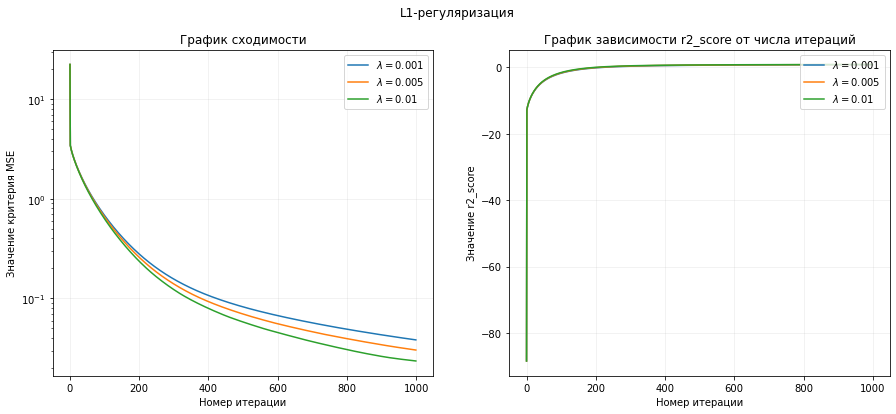

In [86]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
fig.suptitle('L1-регуляризация')
w_0 = np.random.randn(d)
L = max(np.real(np.linalg.eigvals((2 / (X_train.shape[0])) * (X_train.T @ X_train))))
for lmbda in [0.001, 0.005, 0.01]:
    error, accuracy, _ = prox_GD(X_train, y_train, w_0, 1 / L, prox_func_1)
    ax[0].plot(range(len(error)), error, label = r'$\lambda = $' + str(lmbda))
    ax[1].plot(range(len(accuracy)), accuracy, label = r'$\lambda = $' + str(lmbda))
ax[0].set_title('График сходимости')
ax[0].set_ylabel('Значение критерия MSE')
ax[0].set_xlabel('Номер итерации')
ax[0].grid(alpha = 0.2)
ax[0].set_yscale('log')
ax[0].legend(loc = 'upper right')

ax[1].set_title('График зависимости r2_score от числа итераций')
ax[1].set_ylabel('Значение r2_score')
ax[1].set_xlabel('Номер итерации')
ax[1].grid(alpha = 0.2)
ax[1].legend(loc = 'upper right')

plt.show()

Лучшее значение: $\lambda = 0.01$.

Теперь посмотрим на l2-регуляризацию:

100%|██████████████████████████████████████| 1000/1000 [00:02<00:00, 406.90it/s]


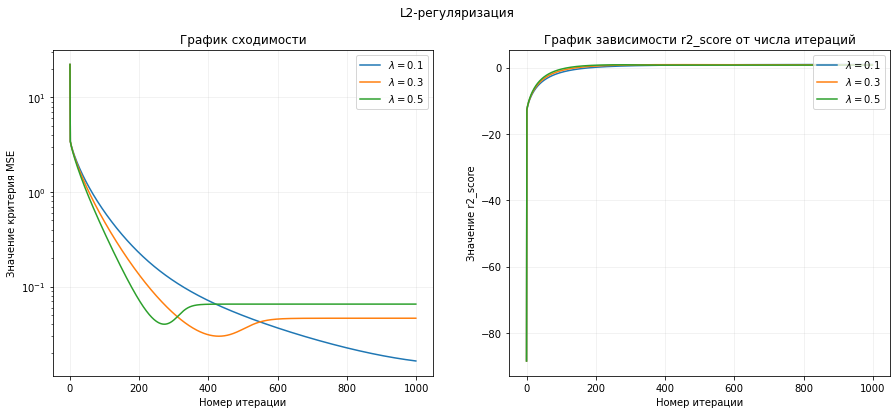

In [88]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
fig.suptitle('L2-регуляризация')
for lmbda in [0.1, 0.3, 0.5]:
    error, accuracy, _ = prox_GD(X_train, y_train, w_0, 1 / L, prox_func_2)
    ax[0].plot(range(len(error)), error, label = r'$\lambda = $' + str(lmbda))
    ax[1].plot(range(len(accuracy)), accuracy, label = r'$\lambda = $' + str(lmbda))

ax[0].set_title('График сходимости')
ax[0].set_ylabel('Значение критерия MSE')
ax[0].set_xlabel('Номер итерации')
ax[0].grid(alpha = 0.2)
ax[0].set_yscale('log')
ax[0].legend(loc = 'upper right')

ax[1].set_title('График зависимости r2_score от числа итераций')
ax[1].set_ylabel('Значение r2_score')
ax[1].set_xlabel('Номер итерации')
ax[1].grid(alpha = 0.2)
ax[1].legend(loc = 'upper right')

plt.show()

Лучшее значение: $\lambda = 0.1$.

По сравнению с пунктом (е) точность уменьшилась, скорость сходимости, правда, чуть получше, но это как бы не сильно решает с учетом первого.

__(з)__ Воспользуемся для нашей задачи методом [PCA](https://ru.wikipedia.org/wiki/Метод_главных_компонент). Прочитайте про него подробнее и опишите основную идею.

Основная идея метода главных компонент (PCA) состоит в том, чтобы спроецировать нашу выборку на подпространство с меньшей размерности с максимальным возможным сохранением дисперсии (то есть с максимальным сохранением информации наших данных)

Следующий код запускает PCA для нашего датасета. Убедитесь, что понимаете происходящие.

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
pca.fit(X_train)  #эта строчка будет работать только если есть матрица X_train
print (pca.explained_variance_ratio_.cumsum())

[0.17105948 0.30230759 0.39600739 0.45841994 0.4986626  0.53641086
 0.56906107 0.59689852 0.62378955 0.64579476]


Какое значение n_components разумно поставить? Для новой матрицы X_train повторите пункт ж). Измерьте время работы процесса обучения. Постройте график точности решения на тестовой выборке от времени работы для честного X_train и полученного с помощью PCA.

Метод explained_variance_ratio_ выдает доли объясненной дисперсии на каждую компоненту, тогда значение n_components надо взять такое, чтобы сумма explained_variance_ratio_ по всем компонентам была около единицы, но не слишком много, иначе теряется смысл.

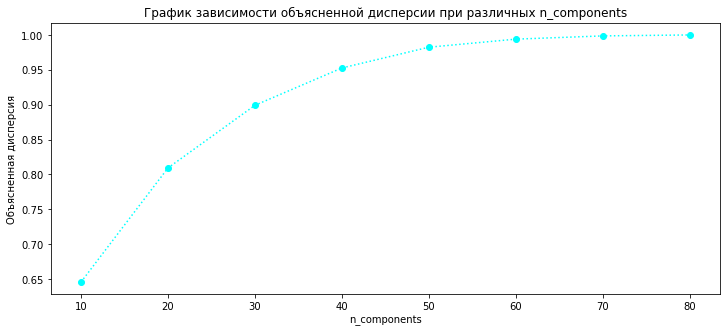

In [31]:
explained_variance = []
n_components_list = range(10, 81, 10)

for n_components in n_components_list:
    pca = PCA(n_components=n_components)
    pca.fit(X_train)

    explained_variance.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(12, 5))
plt.scatter(n_components_list, explained_variance, color = 'cyan')
plt.plot(n_components_list, explained_variance, linestyle = 'dotted', color = 'cyan')
plt.title(r"График зависимости объясненной дисперсии при различных n_components", fontsize=12)
plt.xlabel(r"n_components", fontsize=10)
plt.ylabel(r"Объясненная дисперсия", fontsize=10)
plt.show()

Эвристически возьмем n_components = 50.

In [89]:
n_components = 50
pca = PCA(n_components=n_components)
pca.fit(X_train)
X_new = pca.transform(X)
y_new = 2 * y - 3 # отнормируем признаки

np.random.seed(40)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new)
w_0_new = np.random.sample(n_components)
eigs, _ = np.linalg.eig(X_train_new.T @ X_train_new)
eigs = 2./X_train_new.shape[0] * eigs
L = np.max(eigs).real

100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 500.57it/s]


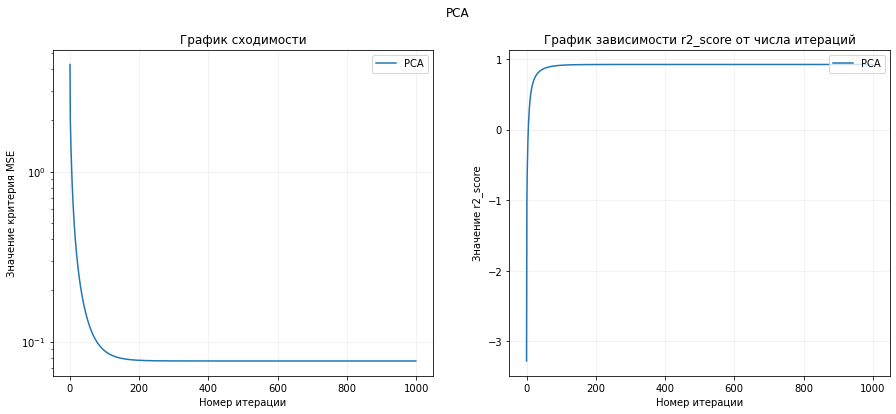

In [70]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
fig.suptitle('PCA')

error, accuracy, _ = prox_GD(X_train_new, y_train_new, w_0_new, 1 / L, identical_prox)
ax[0].plot(range(len(error)), error, label = r'PCA')
ax[1].plot(range(len(accuracy)), accuracy, label = 'PCA')

ax[0].set_title('График сходимости')
ax[0].set_ylabel('Значение критерия MSE')
ax[0].set_xlabel('Номер итерации')
ax[0].grid(alpha = 0.2)
ax[0].set_yscale('log')
ax[0].legend(loc = 'upper right')

ax[1].set_title('График зависимости r2_score от числа итераций')
ax[1].set_ylabel('Значение r2_score')
ax[1].set_xlabel('Номер итерации')
ax[1].grid(alpha = 0.2)
ax[1].legend(loc = 'upper right')

plt.show()

Как видно из графиков, PCA работает очень быстро и крайне точно.

Добаление регуляризации в данный метод не имеет никакого смысла, так как мы уже видели в предыдущем пункте, что она только ухудшает точность модели, а PCA никак не меняет её концепцию.

Посмотрим, что получилось в итоге:

100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 514.45it/s]


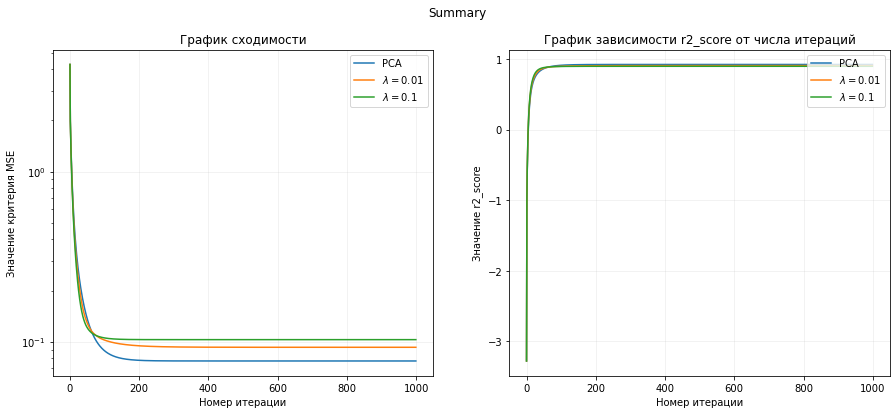

In [90]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
fig.suptitle('Summary')

error, accuracy, _ = prox_GD(X_train_new, y_train_new, w_0_new, 1 / L, identical_prox)
ax[0].plot(range(len(error)), error, label = r'PCA')
ax[1].plot(range(len(accuracy)), accuracy, label = 'PCA')

lmbda = 0.01 
error, accuracy, _ = prox_GD(X_train_new, y_train_new, w_0_new, 1 / L, prox_func_1)
ax[0].plot(range(len(error)), error, label = r'$\lambda = $' + str(lmbda))
ax[1].plot(range(len(accuracy)), accuracy, label = r'$\lambda = $' + str(lmbda))

lmbda = 0.1
error, accuracy, _ = prox_GD(X_train_new, y_train_new, w_0_new, 1 / L, prox_func_2)
ax[0].plot(range(len(error)), error, label = r'$\lambda = $' + str(lmbda))
ax[1].plot(range(len(accuracy)), accuracy, label = r'$\lambda = $' + str(lmbda))

ax[0].set_title('График сходимости')
ax[0].set_ylabel('Значение критерия MSE')
ax[0].set_xlabel('Номер итерации')
ax[0].grid(alpha = 0.2)
ax[0].set_yscale('log')
ax[0].legend(loc = 'upper right')

ax[1].set_title('График зависимости r2_score от числа итераций')
ax[1].set_ylabel('Значение r2_score')
ax[1].set_xlabel('Номер итерации')
ax[1].grid(alpha = 0.2)
ax[1].legend(loc = 'upper right')

plt.show()

Как видно, просто PCA отработал лучше всех, что и было понятно, на самом деле.